<a href="https://colab.research.google.com/github/alvinadar/DBSCAN-Project-/blob/main/DBSCAN_PROJECT_KAGGLE_CreditCard_fraud_Transaction(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import gradio as gr
import io
from PIL import Image
from sklearn.metrics import f1_score, precision_score, recall_score, silhouette_score

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 1.0 Define X and y

In [4]:
df_copy=df.copy()

In [5]:
print(df_copy['Class'].unique())

[0 1]


# Here, I made a copy of df and named it as df_copy so that I can do some testing without disturbing the real dataset which is df.

In [6]:
X = df_copy.drop(columns=['Time','Class'])
y = df_copy['Class']  # Keep for fraud count

In [7]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
X.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [9]:
X.isnull().any()

,0
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False
V10,False


# 2.0 Standardize data

In [10]:
# Standardize
scaler = StandardScaler()
X_scaled_copy = scaler.fit_transform(X)
#X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
#X_scaled_df



# 3.0 Apply DBSCAN eps=0.3, min_samples=10



In [11]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10,n_jobs=-1)
labels = dbscan.fit_predict(X_scaled_copy)

# This process takes about 6-7 minutes to be processed in my PC due to large dataset.

In [12]:
unique_labels=np.unique(labels)
n_cluster=len(unique_labels[unique_labels != -1])
print("Total clusters found:",n_cluster)
print("Cluster labels:",unique_labels)

Total clusters found: 817
Cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 

# With the setting of eps=0.3, min_samples=10, it shows there are total 818 clusters (including noise cluster -1).

In [13]:
# Total number of rows in dataset
total_rows = df_copy.shape[0]   # shape[0] = number of rows
print("Total rows (max sample_size):", total_rows)

Total rows (max sample_size): 284807


# The total sample_size in the dataset is 284807 which means it's a very large dataset. Running the whole sample_size is GRADIO will prompt error because time run out for processing the data.

# **4.0 Add label to DataFrame**

In [14]:
# X_scaled shape: (num_samples, num_features)
num_features = X_scaled_copy.shape[1]

# Automatically generate column names
feature_names = [f"Feature{i+1}" for i in range(num_features)]

# Create DataFrame
df_copy = pd.DataFrame(X_scaled_copy, columns=feature_names)

df_copy['cluster'] = labels
df_copy['Class']=y.values

In [15]:
df_copy

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,cluster,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-1,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-1,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-1,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-1,0
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-1,0
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,529,0
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-1,0


In [16]:
# Count frauds per cluster
fraud_per_cluster = df_copy.groupby('cluster')['Class'].sum()
total_per_cluster = df_copy['cluster'].value_counts()

# Frauds in cluster -1
frauds_in_noise = df_copy[(df_copy['Class']==1) & (df_copy['cluster']==-1)].shape[0]
total_frauds = df_copy[df_copy['Class']==1].shape[0]
fraction_in_noise = frauds_in_noise / total_frauds

# Display results
print("Total points per cluster:")
print(total_per_cluster)
print("\nFraud counts per cluster:")
print(fraud_per_cluster)
print(f"\nFraud transactions in cluster -1: {frauds_in_noise} / {total_frauds} ({fraction_in_noise:.2%})")

fraud_stats = pd.DataFrame({
    'Total Points': total_per_cluster,
    'Fraud Cases': fraud_per_cluster,
    'Fraud %': (fraud_per_cluster / total_per_cluster * 100).round(2)
}).sort_values(by='Fraud %', ascending=False)

print(fraud_stats)

Total points per cluster:
cluster
-1      246109
 470      1543
 461       992
 472       939
 486       774
         ...  
 432         7
 377         6
 332         6
 456         6
 159         5
Name: count, Length: 818, dtype: int64

Fraud counts per cluster:
cluster
-1      491
 0        0
 1        0
 2        0
 3        0
       ... 
 812      0
 813      0
 814      0
 815      0
 816      0
Name: Class, Length: 818, dtype: int64

Fraud transactions in cluster -1: 491 / 492 (99.80%)
         Total Points  Fraud Cases  Fraud %
cluster                                    
 385               33            1     3.03
-1             246109          491     0.20
 537               20            0     0.00
 538               61            0     0.00
 539               58            0     0.00
...               ...          ...      ...
 275               20            0     0.00
 276               26            0     0.00
 277               27            0     0.00
 278              

# Above code checks total fraud in cluster -1 which is 491. Based on above data the total number of fraud (illegal transaction) is 492.Below code checks for fraud cases in which not under noise (cluster -1)

In [17]:
fraud_not_noise = df_copy[(df_copy['Class'] == 1) & (df_copy['cluster'] != -1)]
print(fraud_not_noise)

       Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
68633  0.661784  0.252798  0.127923  0.636815  0.094571 -0.278948  0.127821   

       Feature8  Feature9  Feature10  ...  Feature22  Feature23  Feature24  \
68633 -0.169689 -0.072374  -0.041409  ...  -0.303158  -0.193803  -0.727247   

       Feature25  Feature26  Feature27  Feature28  Feature29  cluster  Class  
68633   1.288259   -0.85752   0.081356   0.062409  -0.348512      385      1  

[1 rows x 31 columns]


# Based on the data above, row 68633 and cluster 385 shows fraud detection.



# 5.0 Apply DBSCAN (eps=2) and min_samples=5 (Based on our analysis for finding best eps value and min_sample). This eps and min_sample have high F1 score. Please look into my other colab file attached for details.



Based on K-distance, F1 score and Silhouette score optimum eps value is 2 and min_sample is 5

In [18]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5,n_jobs=-1)
labels = dbscan.fit_predict(X_scaled_copy)

# Checking Total cluster and unique labels

In [19]:
unique_labels=np.unique(labels)
n_cluster=len(unique_labels[unique_labels != -1])
print("Total clusters found:",n_cluster)
print("Cluster labels:",unique_labels)

Total clusters found: 711
Cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 

# With DBSCAN eps=2 , min_samples=5, shows total number of cluster is 712 (including noise -1)

In [20]:
# X_scaled shape: (num_samples, num_features)
num_features = X_scaled_copy.shape[1]

# Automatically generate column names
feature_names = [f"Feature{i+1}" for i in range(num_features)]

# Create DataFrame
df_copy = pd.DataFrame(X_scaled_copy, columns=feature_names)

df_copy['cluster'] = labels
df_copy['Class']=y.values

In [21]:
df_copy

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,cluster,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,1,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-1,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,2,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,1,0
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,8,0
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,3,0
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0,0


In [22]:
# Count frauds per cluster
fraud_per_cluster = df_copy.groupby('cluster')['Class'].sum()
total_per_cluster = df_copy['cluster'].value_counts()

# Frauds in cluster -1
frauds_in_noise = df_copy[(df_copy['Class']==1) & (df_copy['cluster']==-1)].shape[0]
total_frauds = df_copy[df_copy['Class']==1].shape[0]
fraction_in_noise = frauds_in_noise / total_frauds

# Display results
print("Total points per cluster:")
print(total_per_cluster)
print("\nFraud counts per cluster:")
print(fraud_per_cluster)
print(f"\nFraud transactions in cluster -1: {frauds_in_noise} / {total_frauds} ({fraction_in_noise:.2%})")

fraud_stats = pd.DataFrame({
    'Total Points': total_per_cluster,
    'Fraud Cases': fraud_per_cluster,
    'Fraud %': (fraud_per_cluster / total_per_cluster * 100).round(2)
}).sort_values(by='Fraud %', ascending=False)

print(fraud_stats)

Total points per cluster:
cluster
 0      80217
 1      72059
-1      50151
 9      10564
 3       9494
        ...  
 676        3
 283        3
 245        2
 186        2
 250        2
Name: count, Length: 712, dtype: int64

Fraud counts per cluster:
cluster
-1      419
 0       13
 1        9
 2        0
 3        0
       ... 
 706      0
 707      0
 708      0
 709      0
 710      0
Name: Class, Length: 712, dtype: int64

Fraud transactions in cluster -1: 419 / 492 (85.16%)
         Total Points  Fraud Cases  Fraud %
cluster                                    
99                  8            8   100.00
273                 6            6   100.00
110                22           20    90.91
124                16            6    37.50
582                 4            1    25.00
...               ...          ...      ...
245                 2            0     0.00
246                 5            0     0.00
247                13            0     0.00
248                 5        

In [28]:
fraud_not_noise = df_copy[(df_copy['Class'] == 1) & (df_copy['cluster'] != -1)].shape[0]
print(fraud_not_noise)
other_than_noise= df_copy[(df_copy['Class'] == 1) & (df_copy['cluster'] != -1)]
print(other_than_noise.to_string())

73
         Feature1   Feature2   Feature3  Feature4   Feature5  Feature6   Feature7   Feature8  Feature9  Feature10  Feature11  Feature12  Feature13  Feature14  Feature15  Feature16  Feature17  Feature18  Feature19  Feature20  Feature21  Feature22  Feature23  Feature24  Feature25  Feature26  Feature27  Feature28  Feature29  cluster  Class
10484    0.555664   0.544099   0.260303  2.239094   0.127324 -0.166619  -0.018583  -0.009104  0.782833  -0.544128   1.050962  -2.549597   1.241821  -0.344573  -1.116943   0.383043   2.706820  -0.193392  -1.882842  -0.281945  -0.576638  -1.103558   0.124291   0.276743   0.671777  -0.246650   0.032078   0.164366  -0.338077       36      1
10497    0.607438   0.570633   0.054301  2.135830   0.298792 -0.160939   0.043293  -0.092396  0.804454  -0.509000   0.151778  -2.778981   1.649002  -0.475777  -1.355178   0.978398   2.009835   0.627971  -1.062731  -0.186056  -0.684302  -1.443292  -0.090882  -0.562521   1.038287  -0.203847  -0.007534   0.150929  -0.338

# With DBSCAN eps=2 and min_samples=5, it shows another 73 rows with different clusters in dataset detected as fraud (excluding noise -1)

# 6.0 Function for GRADIO

In [29]:
# Features
X = df.drop(columns=['Time','Class'])
y = df['Class'].values
feature_names = X.columns.tolist()   # keep feature names for dropdowns in GRADIO


# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan_model=None # create global variable
X_sampled_for_dbscan=None #create global variable

def run_dbscan(eps, min_samples, sample_size, feature_x, feature_y):
    global dbscan_model, X_sampled_for_dbscan
    # Ensure sample size is within dataset limit
    sample_size = min(sample_size, X_scaled.shape[0]) # sample_size is set in GRADIO, X_scaled.shape[0] is total number of rows in the dataset, min(...) is to ensure it just takes the maximum possible (the whole dataset)
    indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False) #randomly pick sample_size's unique indices from 0 to n-1

    X_sample = X_scaled[indices] #X_scaled dataset features(Numpy Array), indices -> pick only the rows whose positions are in indices,so X_sample contains only the sampled transaction for clustering
    y_sample = y[indices]  # Keep fraud labels for sampled data, y=the class labels (0=normal,1=fraud), [indices] ensures select the same rows as in X_sample

    # Get selected feature indices
    x_idx = feature_names.index(feature_x) #find the position of feature_x in the list feature_names, feature_names comes from above code
    y_idx = feature_names.index(feature_y) ##find the position of feature_y in the list feature_names, feature_names comes from above code

    # Apply DBSCAN
    dbscan_model = DBSCAN(eps=eps, min_samples=int(min_samples),n_jobs=-1)
    labels = dbscan_model.fit_predict(X_sample) # X_sample is feed into DBSCAN, not X_scaled, so each time we run DBSCAN the cluster number will change and the order is not fixed since --> X_sample = X_scaled[indices]
    X_sampled_for_dbscan=X_sample

    # Prepare plot
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels) # extract the unique cluster id after DBSCAN performed
    colors = plt.cm.get_cmap('hsv', len(unique_labels)) # len(unique_labels) ensures that we get exactly as many distinct colors as there are clusters
    for i, k in enumerate(unique_labels):#enumerate let us perform both i and k, i=loop counter (0,1,2...), k= the actual cluster ID (-1,0,1,2..... )
        mask = (labels == k)# creates a boolean mask, True where the point belongs to cluster k, when labels equal to k,it's inside for loop, each time mask updated,the plot also updated
        if np.any(mask):# checks that this cluster actually has at least one point
            color = 'black' if k == -1 else colors(i)
            plt.scatter(
                X_sample[mask, x_idx],#x-values (for the selected feature) of all points in cluster k, X_sample[mask,:]=selects only the rows that belong to cluster k
                X_sample[mask, y_idx],#y-values (for the selected feature) of all points in cluster k, [:,y_idx]= select just column for the choosen feature
                c=np.array([color] * mask.sum()),
                s=20,
                label=f'Cluster {k}'
            )
    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.xlabel(f"{feature_x} (scaled)")
    plt.ylabel(f"{feature_y} (scaled)")
    plt.legend(title="Cluster Number")

    # Save plot to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()
    img = Image.open(buf)

    # Fraud stats per cluster
    df_clustered = pd.DataFrame({
        'cluster': labels,
        'Class': y_sample
    }) ## created_clustered DataFrame, create both cluster and Class columns (create from dictionary)

    fraud_per_cluster = df_clustered.groupby('cluster')['Class'].sum() # counts how many total frauds, cluster becomes index, counting how many Class equal to 1
    total_per_cluster = df_clustered.groupby('cluster')['Class'].count() # counts how many total point, cluster becomes index
    total_frauds = df_clustered[df_clustered['Class']==1].shape[0]

    fraud_stats = pd.DataFrame({ # create DataFrame with cluster as index (create from dictionary)
        'Total Points': total_per_cluster,
        'Fraud Cases': fraud_per_cluster,
        'Fraud %': (fraud_per_cluster / total_per_cluster * 100).round(2)
    }).fillna(0).reset_index().rename(columns={'cluster':'Cluster'}) # Turns back cluster into a normal column and rename it as Cluster and creates a column (Pandas preserves the sorted order of cluster labels when we use grouby('cluster'))

    # Evaluation metrics (Noise = -1 treated as fraud/anomaly)
    predicted_fraud = np.where(labels == -1, 1, 0) # change all labels into binary 0,1 (when label is-1 it's changed to 1, other labels/cluster changed to 0 )
    f1 = f1_score(y_sample, predicted_fraud) # since we have Class column, we can use f1_score, precision, recall
    precision = precision_score(y_sample, predicted_fraud)
    recall = recall_score(y_sample, predicted_fraud)
    sil_score = silhouette_score(X_sample, labels) if len(set(labels)) > 1 else -1 # we can use silhouette_score for unsupervised learning

    eval_df = pd.DataFrame({ # create a DataFrame
        "Metric": ["F1 Score", "Precision", "Recall", "Silhouette"],
        "Value": [f1, precision, recall, sil_score]
    })

    return img, total_frauds, fraud_stats,eval_df


# Function for new data prediction
def predict_new_data(new_data):
    global dbscan_model, X_sampled_for_dbscan # dclare global variables
    if dbscan_model is None: # must run dbscan first else prompt error
        return "Run DBSCAN first!"

    # Parse comma-separated input safely
    try:
        input_features = [float(x.strip()) for x in new_data.split(',')]
    except ValueError:
        return "Invalid input! Ensure numbers are comma-separated."

    if len(input_features) != X_scaled.shape[1]: # checking whether the input that we keyed in is equivalent to the total number of columns
        return f"Expected {X_scaled.shape[1]} features, got {len(input_features)}" # return error if it's not same

    # Scale new point
    new_scaled = scaler.transform([input_features]) # scaled the new data if the input are same as len(input_features)

    # Check if DBSCAN has core samples
    if len(dbscan_model.components_) == 0: # The global variable carries the information
        return "DBSCAN did not find any core samples in the current run."

    # Compute distance to core samples
    distances = np.linalg.norm(dbscan_model.components_ - new_scaled, axis=1)
    nearest_core_idx = np.argmin(distances)
    nearest_cluster = dbscan_model.labels_[dbscan_model.core_sample_indices_[nearest_core_idx]]

    # Check if new point is within eps of nearest core sample
    if distances[nearest_core_idx] <= dbscan_model.eps: # if the value less or equal than eps value, it belongs to that cluster
        return f"New data belongs to Cluster {nearest_cluster}"
    else:
        return "New data detected as Noise (Possible anomaly/fraud)"

# 7.0 GRADIO Interface

In [30]:
# Gradio interface
demo = gr.Interface(
    fn=run_dbscan,
    inputs=[
        gr.Slider(0.1, 10.0, value=2.0, step=0.1, label="eps"),
        gr.Slider(2, 50, value=5, step=1, label="min_samples"),
        gr.Slider(50, 284807, value=50000, step=50, label="Sample Size"),
        gr.Dropdown(choices=feature_names, value=feature_names[0], label="Feature X"),
        gr.Dropdown(choices=feature_names, value=feature_names[1], label="Feature Y"),
    ],
    outputs=[
        gr.Image(type="pil", label="DBSCAN Plot"),
        gr.Textbox(label="Total Fraud Count"),
        gr.Dataframe(label="Fraud Stats per Cluster",col_count=(4,"dynamic")),
        gr.Dataframe(label="Evaluation Metrics", interactive=False)
    ]
)

# Second Gradio app (new data prediction)
predict_demo = gr.Interface(
    fn=predict_new_data,
    inputs=gr.Textbox(label=f"Enter {len(feature_names)} features (comma separated)"),
    outputs=gr.Textbox(label="Prediction Result"),
    title="Predict New Transaction",
    description="Enter new transaction features to check cluster membership / fraud."
)

# Combine
app = gr.TabbedInterface([demo, predict_demo], ["DBSCAN Clustering", "New Data Prediction"]) #combine 2 functions together

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://647e7194f2367cfc11.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Using eps=0.3, min_sample=10, sample size 284807

This is kaggle dataset. It's known Case 1 as fraud and Case 0 as normal. Based on our DBSCAN unsupervised machine learning with eps=0.3 and min_samples=10 , it shows about 818 total number of cluster. This is based on the entire dataset size (sample size= 284807). But With GRADIO, we can change eps and min_samples using the slider. We also can change sample_size using the slider to view the output. I give option to limit the Sample Size accordingly in order for faster processing time (this is because this dataset are really large). Choosing Feature X and Feature Y is only for visualization. The Total Fraud Count (TextBox in GRADIO) and Fraud Stats per Cluster(DataFrame In GRADIO) is based on the number of Sample Size that we select.

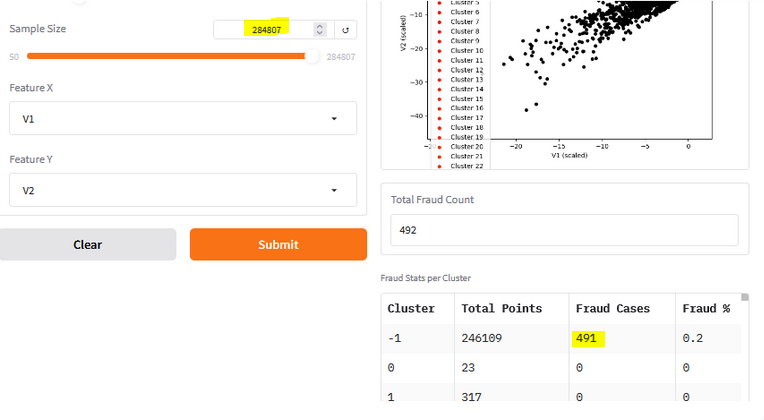

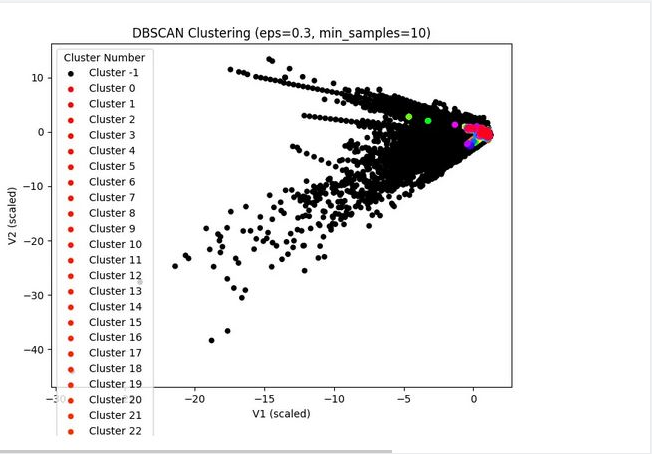

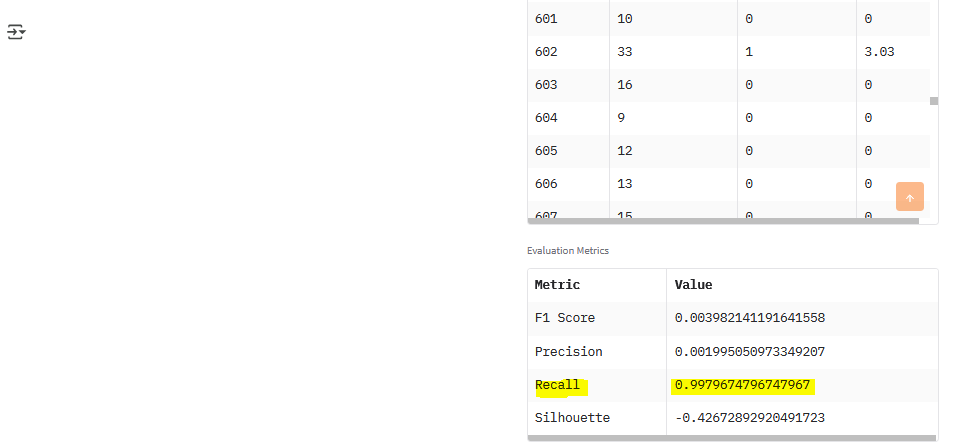

Although this is unsupervised Machine Learning, since we have the Class column, we able to evaluate the model using F1 Score, Precision and Recall. The highlight here is the Recall value which is 0.997. High Recall value means high number of Fraud (Class 1) being detected with one cluster number (which is cluster -1). About 99% of fraud transaction happens in noise cluster (-1). The Silhouette score is low as expecteted due to the data imbalance. It happens when a cluster is very large and points are very close together but some points but some points are far away(noise), the Silhouette can be negative, meaning some points are closer to points in other clusters than their own cluster. Low precision is due to almost majority of -1 (noise) transaction is not fraud and high number of False Prediction. However, DBSCAN treat -1 (noise) as fraud.

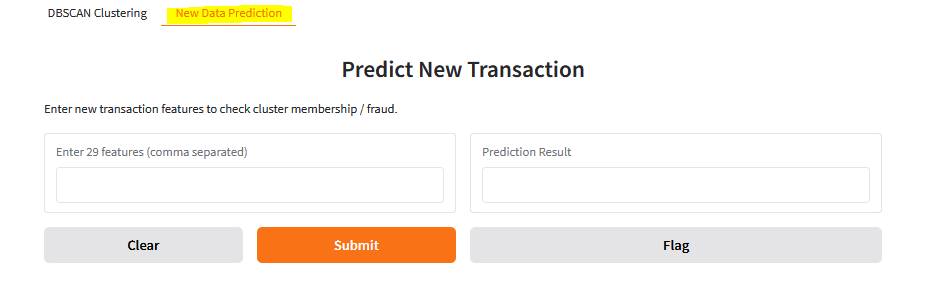

I have added New Data Prediction tab in GRADIO It predicts the input belongs to which cluster. It's not predicting the output. Since this is unsupervised Machine Learning, we cannot predict the output using DBSCAN.

# Using eps=2 and min_samples=5 and Sample Size= 284807

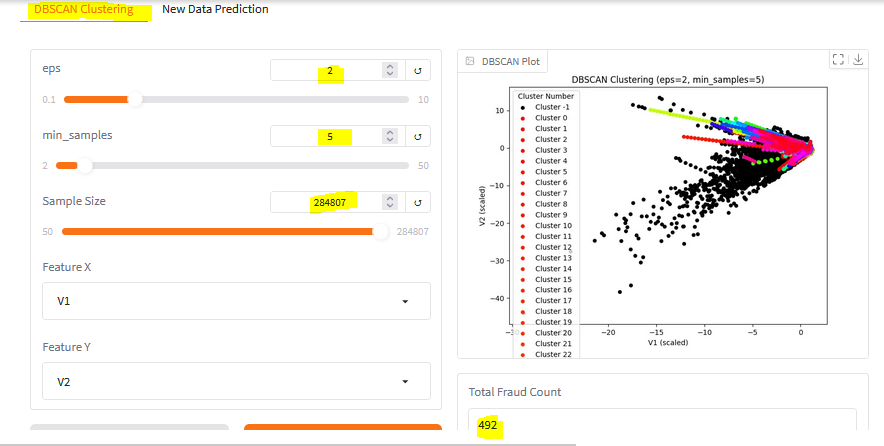

# It shows the total number of fraud is as same as previous eps , min_sample selection which is 492

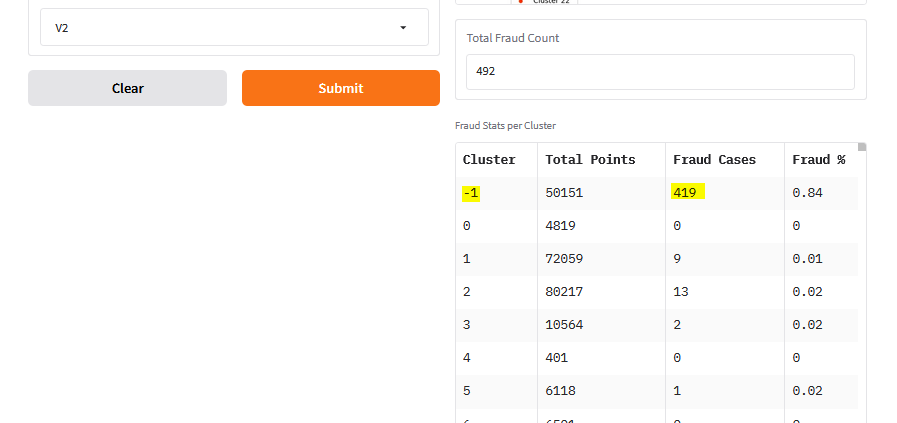

# The table shows 419 fraud detection occurs during noise (-1)

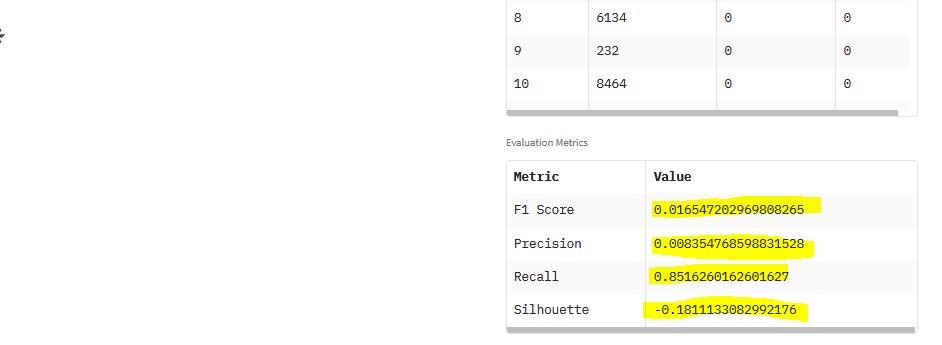

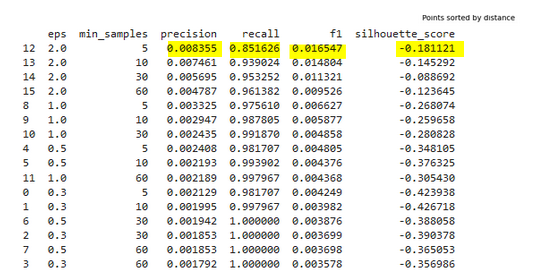

# The Recall, Precision, F1 Score and Silhouette score values is as same as our previous calculation in another colab (Finding_suitable_eps_min_samples_for_DBSCAN.ipynb). Refer to table above from that colab.